## <span style="color:navy"> Esercitazione 11</span>

Lo scopo di questa esercitazione è imparare a utilizzare Neural Network per per eseguire delle regressioni di dati rumorosi, con funzioni via via più complicate

### <span style="color:teal"> Esercizio 11.1</span>

In questo esercizio, per prendere la mano con le NN, ho provato a modificare il numero di epoche $N_{\mathrm{epochs}}$, la quantità di dati $N_{\mathrm{train}}$ e il rumore gaussiano $\sigma$ della NN fornita dalla consegna per cercare di ottimizzare il fit lineare della funzione $
f(x)=2x+1
$

In [1]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

In [2]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.1 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

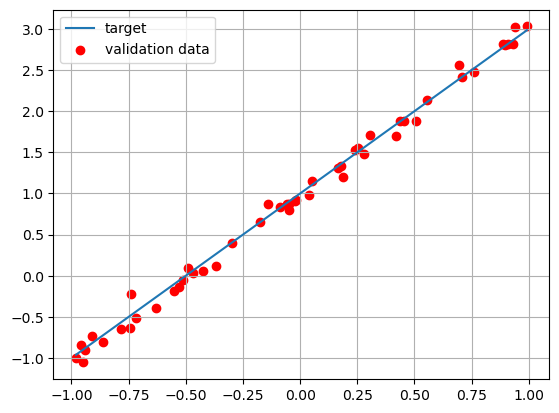

In [3]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

costruisci il modello

In [4]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

2025-07-02 11:43:26.768221: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/luca/anaconda3/envs/Simulazione/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# get a summary of our composed model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

allena il modello 

In [6]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.0522 - mse: 3.0522 - val_loss: 2.1696 - val_mse: 2.1696
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8916 - mse: 1.8916 - val_loss: 1.3271 - val_mse: 1.3271
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1283 - mse: 1.1283 - val_loss: 0.8469 - val_mse: 0.8469
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7003 - mse: 0.7003 - val_loss: 0.5515 - val_mse: 0.5515
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4569 - mse: 0.4569 - val_loss: 0.3641 - val_mse: 0.3641
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3025 - mse: 0.3025 - val_loss: 0.2421 - val_mse: 0.2421
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2034 - mse: 0.2034 - val_loss: 0.1625 - val_mse: 0.1625
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1290 - mse: 0.1290 - val_loss: 0.1097 - val_mse: 0.1097
Epoch 9/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0875 - mse: 

In [7]:
# return weights and biases
model.get_weights()

[array([[1.9923912]], dtype=float32), array([1.0026376], dtype=float32)]

In [8]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0089 - mse: 0.0089

Test loss: 0.00849029142409563
Test accuracy: 0.00849029142409563


In [9]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.2913e-05 - mse: 3.2913e-05

Test loss: 2.9016109692747705e-05
Test accuracy: 2.9016109692747705e-05


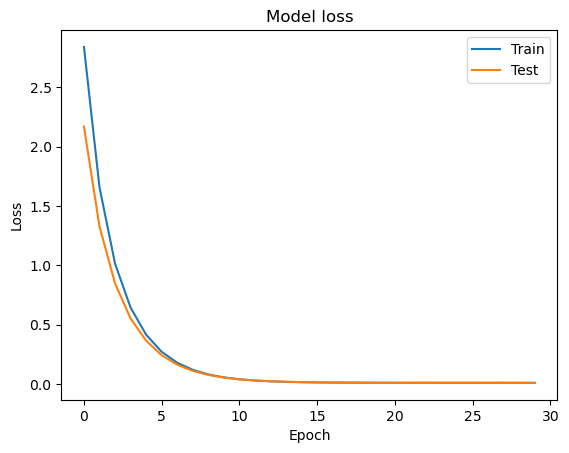

In [10]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


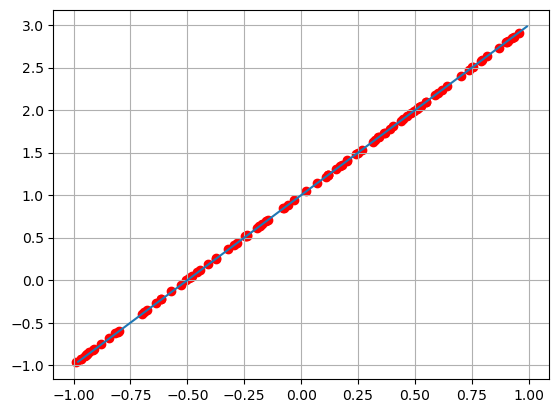

In [11]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

Provando diverse combinazioni, ho capito che:
- Aumentare le epoche sopra 20/25 non serve perchè la loss rimane costante
- Il fit sembra migliorare aumentando il numero di dati di training fino a 1000
- Il risultato peggiora se aumento il rumore dei dati di training, ma sarebbe sbagliato rimuoverlo perchè la NN rischierebbe di andare in overfitting

### <span style="color:teal"> Esercizio 11.2</span>

Ho sfruttato quanto imparato per estendere il modello al fit di un polinomio di terzo grado $$
f(x)=4-3x-2x^2+3x^3
$$
con $x \in [-1,1]$.

In [12]:
import numpy as np

# target parameters of f(x) = a*x^3 + b*x^2 +c*x +d
def f(x, a=4, b=-3, c=-2, d=3):
    return a + b*x + c*(x)**2 + d*(x)**3

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 10000)
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
y_target = f(x_valid) # ideal (target) function

sigma = 0.1 # noise standard deviation
y_train = np.random.normal(f(x_train), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(f(x_valid), sigma)

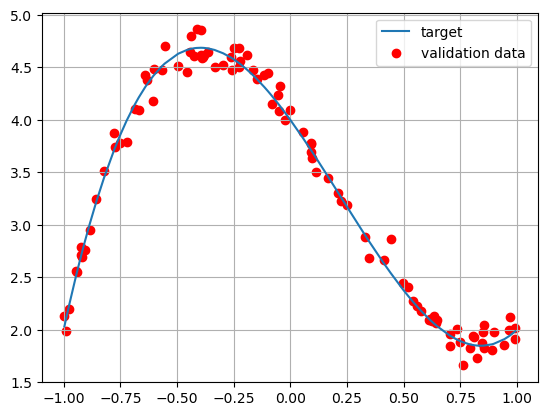

In [13]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

Ho modificato la struttura della NN, rendendola più sofisticata e adatta allo scopo. Ho costruito un modello sequenziale a quattro layer:
  - Primo layer da 128 neuroni che riceve l'input
  - Secondo layer da 16 neuroni
  - Terzo layer da 32 neuroni
  - Ultimo layer con un singolo neurone di output

Per tutti i layer ho utilizzato "ReLU" come funzione di attivazione, come ottimizzatore per il modello ho scelto sgd(stochastic gradient descent) e come loss e metrica mse(mean square error)


In [14]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(128, input_shape=(1,),activation='relu'))
#model.add(Dropout(0.2))#SPEGNE IL 20% DI NEURONI del layer precedente
model.add(Dense(16,activation='relu'))
#model.add(Dropout(0.1))#SPEGNE IL 10% DI NEURONI, tutela contro l'overfitting
model.add(Dense(32,activation='relu'))
model.add(Dense(1,))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [15]:
# Sommario della struttura del modello
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 128)            │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,897 (11.32 KB)

 Trainable params: 2,897 (11.32 KB)

 Non-trainable params: 0 (0.00 B)

Alleno il modello con 20 epoche da 32 batch

In [16]:
# fit the model using training dataset
# over 20 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=30, epochs=20,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/20
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6071 - mse: 1.6071 - val_loss: 0.0876 - val_mse: 0.0876
Epoch 2/20
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0563 - mse: 0.0563 - val_loss: 0.0349 - val_mse: 0.0349
Epoch 3/20
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0209 - val_mse: 0.0209
Epoch 4/20
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0188 - val_mse: 0.0188
Epoch 5/20
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0179 - val_mse: 0.0179
Epoch 6/20
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0194 - val_mse: 0.0194
Epoch 7/20
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0139 - val_mse: 0.0139
Epoch 8/20
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 9/20
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

In [17]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=30)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0135 - mse: 0.0135 

Test loss: 0.013647381216287613
Test accuracy: 0.013647381216287613


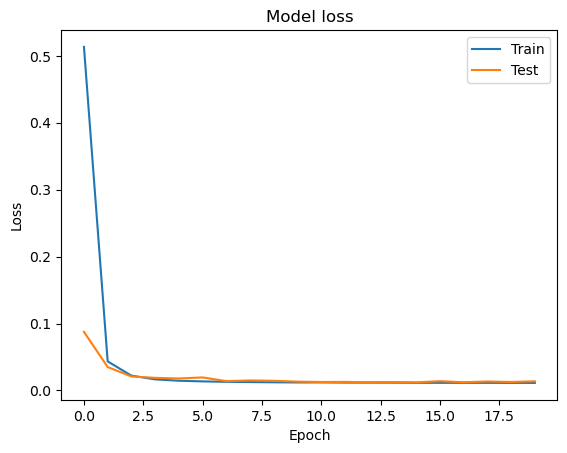

In [18]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


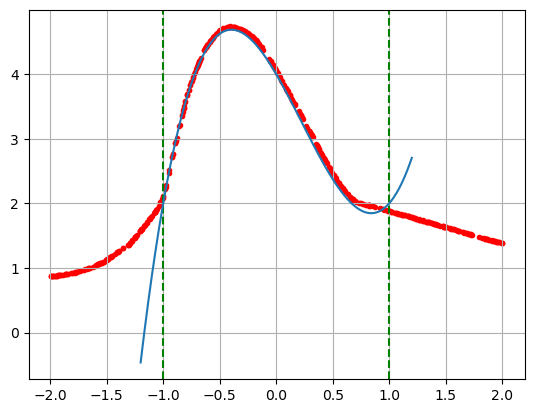

In [19]:
x_predicted = np.random.uniform(-2, 2, 500)
y_predicted = model.predict(x_predicted)

x_valid = np.linspace(-1.2, 1.2, 300)
y_target= f(x_valid)

plt.axvline(1., color = 'g', linestyle = '--')
plt.axvline(-1., color = 'g', linestyle = '--')
plt.scatter(x_predicted, y_predicted,color='r', marker = ".")
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

Dopo aver provato diverse variazioni nella struttura della NN, sono arrivato al risultato riportato nel grafico sopra.

Come si può osservare, il modello che ho costruito predice correttamente il fit della funzione nella regione in cui è stato allenato ($x \in [-1,1]$). Ha qualche problema nella zona finale di questo intervallo in cui la funzione reale ha una risalita. Questo tratto della funzione è difficile da prevedere a causa della piccola dimensione di questo sottointervallo crescente con un andamento molto diverso dal resto della funzione. Questo problema potrebbe essere risolto fornendo dati extra in questa regione critica.

Al di fuori del range di training il modello fallisce clamorosamente, mostrando una bassa capacità di generalizzazione.

### <span style="color:teal"> Esercizio 11.3</span>

Ho esteso nuovamente il modello per fare in modo che predica una funzione 2D come $f(x,y) = \sin(x^2+y^2)$ nell'intervallo $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

In [31]:
import numpy as np

def g(x, y):
    return np.sin(x**2 + y**2)

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1.5, 1.5, 10000)
x_valid = np.random.uniform(-1.5, 1.5, 2000)
y_train = np.random.uniform(-1.5, 1.5, 10000)
y_valid = np.random.uniform(-1.5, 1.5, 2000)

sigma = 0.1 # noise standard deviation
z_train = np.random.normal(g(x_train,y_train), sigma) # actual measures from which we want to guess regression parameters
z_valid = np.random.normal(g(x_valid,y_valid), sigma)

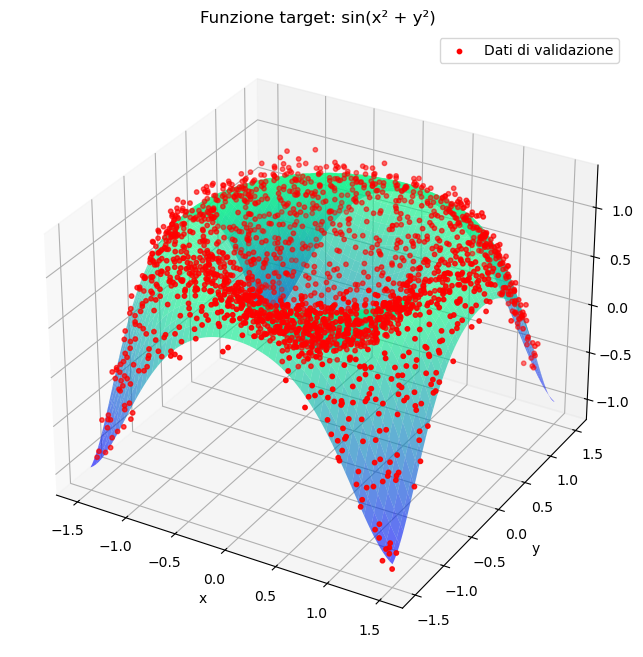

In [32]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #estensione per grafici 3d
import numpy as np

# Combina le variabili di input per il modello
X_train = np.column_stack((x_train, y_train))
X_valid = np.column_stack((x_valid, y_valid))

# Visualizzazione dei dati di validation
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot della funzione target
x_plot = np.linspace(-3/2, 3/2, 100)
y_plot = np.linspace(-3/2, 3/2, 100)
X_plot, Y_plot = np.meshgrid(x_plot, y_plot)
Z_plot = g(X_plot, Y_plot)
ax.plot_surface(X_plot, Y_plot, Z_plot, cmap='winter', alpha=0.6)

# Plot dei punti di validation
ax.scatter(x_valid, y_valid, z_valid, color='red', s=10, label='Dati di validazione')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Funzione target: sin(x² + y²)')
plt.legend()
plt.show()

Non fatto modifiche sostanziali alla struttura del modello, ho solo cambiato input shape da 1 a 2 per adattarlo alle dimensioni del problema.

In [33]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(128, input_shape=(2,),activation='relu'))
#model.add(Dropout(0.2))#SPEGNE IL 20% DI NEURONI del layer precedente
model.add(Dense(16,activation='relu'))
#model.add(Dropout(0.1))#SPEGNE IL 10% DI NEURONI, tutela contro l'overfitting
model.add(Dense(32,activation='relu'))
model.add(Dense(1,))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [34]:
# Sommario della struttura del modello
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,025 (11.82 KB)

 Trainable params: 3,025 (11.82 KB)

 Non-trainable params: 0 (0.00 B)

Ho aumentato a 35 il numero di epoche per compensare la difficoltà maggiore del problema

In [35]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=X_train, y=z_train, 
          batch_size=30, epochs=35,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(X_valid, z_valid))

Epoch 1/35
334/334 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2482 - mse: 0.2482 - val_loss: 0.1375 - val_mse: 0.1375
Epoch 2/35
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1479 - mse: 0.1479 - val_loss: 0.1262 - val_mse: 0.1262
Epoch 3/35
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1303 - mse: 0.1303 - val_loss: 0.1132 - val_mse: 0.1132
Epoch 4/35
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1135 - mse: 0.1135 - val_loss: 0.0980 - val_mse: 0.0980
Epoch 5/35
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1007 - mse: 0.1007 - val_loss: 0.0803 - val_mse: 0.0803
Epoch 6/35
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0829 - mse: 0.0829 - val_loss: 0.0610 - val_mse: 0.0610
Epoch 7/35
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0635 - mse: 0.0635 - val_loss: 0.0445 - val_mse: 0.0445
Epoch 8/35
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0459 - mse: 0.0459 - val_loss: 0.0337 - val_mse: 0.0337
Epoch 9/35
334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

In [36]:
# evaluate model
score = model.evaluate(X_valid, z_valid, batch_size=30)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0108 - mse: 0.0108 

Test loss: 0.01100974902510643
Test accuracy: 0.01100974902510643


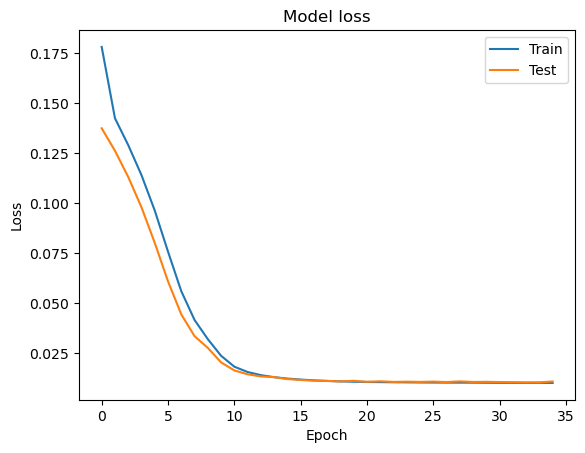

In [37]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


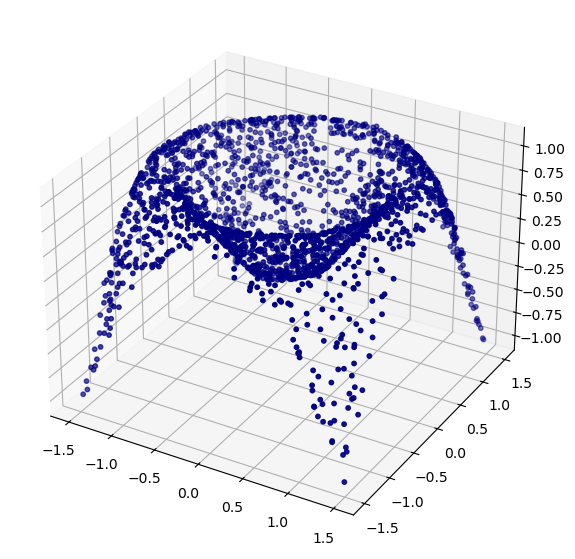

In [38]:
x_predicted = np.random.uniform(-1.5, 1.5, 2000)
y_predicted = np.random.uniform(-1.5, 1.5, 2000)
X_predicted = np.column_stack ((x_predicted,y_predicted))
z_predicted = model.predict(X_predicted)

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter points: x, y, prediction
ax.scatter(x_predicted, y_predicted , z_predicted.flatten(), c='navy', s=10)


Dal grafico sopra che raffigura la predizione della rete neurale della funzione 2D possiamo affermare che il modello puà essere esteso a funzioni di più variabili, mostrando buone capacità di approssimazione anche in dimensioni maggiori.